# Weighted Least Squares

## Example: Education Expenditure Data

### 1.  Loading data-set

In [2]:
# Table 7.2 Education Expenditure Data

dat <- read.table("education_expenditure.txt",header=T)
head(dat)
tail(dat)
dim(dat)

State,Y,X1,X2,X3,Region
ME,235,3944,325,508,1
NH,231,4578,323,564,1
VT,270,4011,328,322,1
MA,261,5233,305,846,1
RI,300,4780,303,871,1
CT,317,5889,307,774,1


,State,Y,X1,X2,X3,Region
45,NV,291,5560,330,809,4
46,WA,312,4989,313,726,4
47,OR,316,4697,305,671,4
48,CA,332,5438,307,909,4
49,AK,546,5613,386,484,4
50,HI,311,5309,333,831,4


[1] 50  6

### 2. Multiple Linear Regression (197 page)

Y = β0 + β1X1 + β1X2 + β1X3 + ε (7.8)
-> 일반선형회귀분석

In [3]:
# linear model fit
attach(dat)
res_lm <- lm(Y ~ X1 + X2 + X3)
summary(res_lm)


Call:
lm(formula = Y ~ X1 + X2 + X3)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.878 -26.878  -3.827  22.246  99.243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.566e+02  1.232e+02  -4.518 4.34e-05 ***
X1           7.239e-02  1.160e-02   6.239 1.27e-07 ***
X2           1.552e+00  3.147e-01   4.932 1.10e-05 ***
X3          -4.269e-03  5.139e-02  -0.083    0.934    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.47 on 46 degrees of freedom
Multiple R-squared:  0.5913,	Adjusted R-squared:  0.5647 
F-statistic: 22.19 on 3 and 46 DF,  p-value: 4.945e-09


In [4]:
# Table 7.4 Regression Results: State Expenditures on Education $(n=50)$
round(summary(res_lm)$coefficient,3)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-556.568,123.195,-4.518,0.000
X1,0.072,0.012,6.239,0.000
X2,1.552,0.315,4.932,0.000
X3,-0.004,0.051,-0.083,0.934


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

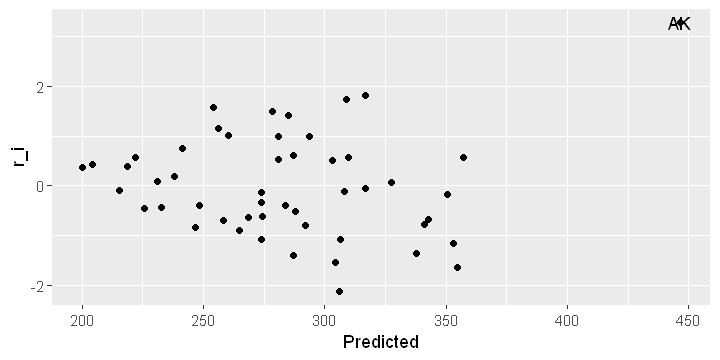

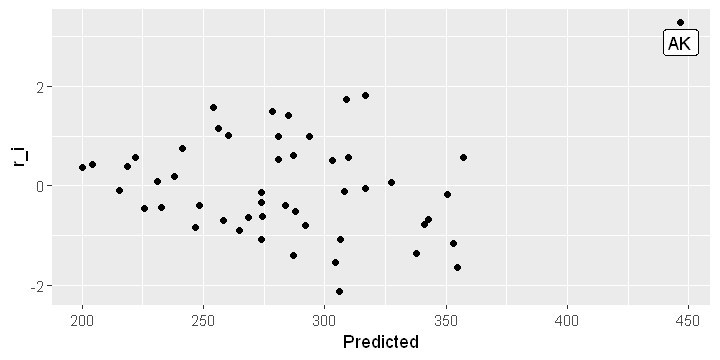

In [5]:
# Figure 7.3 Plot of standardized residuals versus fitted values (201 page)
library(ggplot2)

# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# residual plot
res.dat <- cbind(dat, rstandard(res_lm), predict(res_lm))
colnames(res.dat)[c(7,8)] <- c("r_i", "Predicted")

# add annotation: "AK"
library(dplyr)
sub.res.dat <- res.dat %>% filter(res.dat$State == "AK")

# type 1
ggplot(res.dat, aes(x = Predicted, y = r_i)) + geom_point() +
geom_text(aes(label= State), data=sub.res.dat)

# type 2
library(ggrepel)
ggplot(res.dat, aes(x = Predicted, y = r_i)) + geom_point() +
ggrepel::geom_label_repel(aes(label = State), data = sub.res.dat)

Figure 7.4 Plot of standardized residuals versus Regions (201 page)

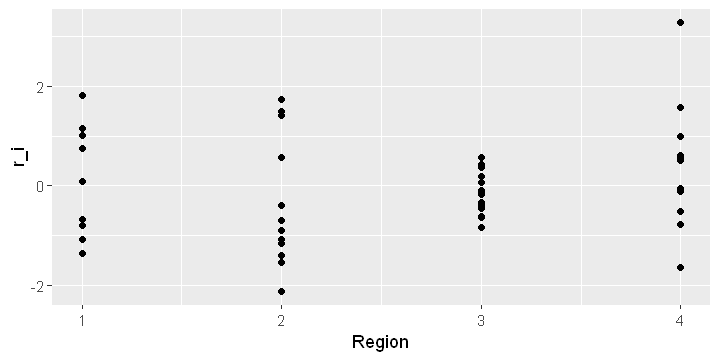

In [6]:
ggplot(res.dat, aes(x = Region, y = r_i)) + geom_point()

Figure 7.5 Plot of standardized residuals versus each of the predictor variable X1 (201 page)

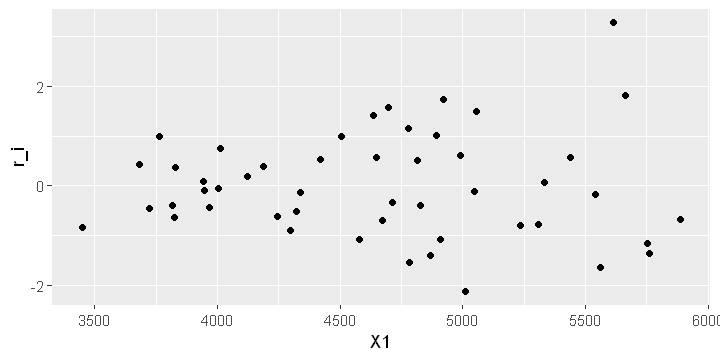

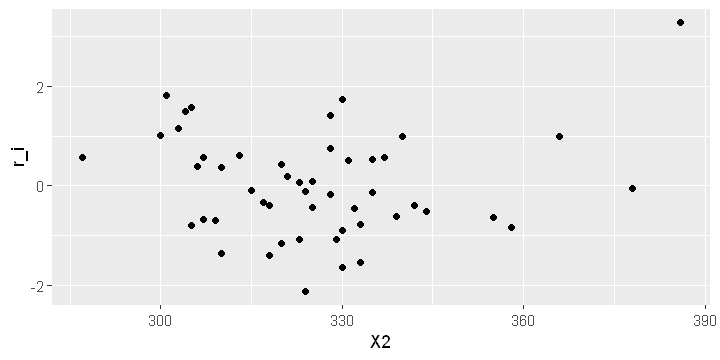

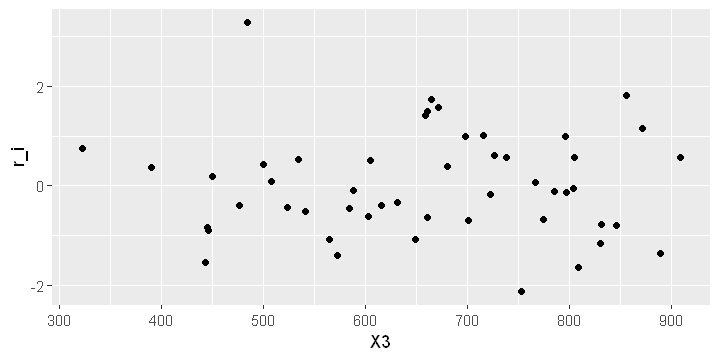

In [10]:
g1 <- ggplot(res.dat, aes(x = X1, y = r_i)) + geom_point()
g2 <- ggplot(res.dat, aes(x = X2, y = r_i)) + geom_point()
g3 <- ggplot(res.dat, aes(x = X3, y = r_i)) + geom_point()

g1
g2
g3

Multiple Linear Regression, Alaska Omitted (203 page)

In [11]:
sub.dat <- dat %>% filter(dat$State != "AK")
dim(sub.dat)

[1] 49  6

In [12]:
 # linear model fit
attach(sub.dat)
sub.res_lm <- lm(Y ~ X1 + X2 + X3)
summary(sub.res_lm)

The following objects are masked from dat:

    Region, State, X1, X2, X3, Y




Call:
lm(formula = Y ~ X1 + X2 + X3)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.128 -22.154  -7.542  22.542  80.890 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -277.57731  132.42286  -2.096 0.041724 *  
X1             0.04829    0.01215   3.976 0.000252 ***
X2             0.88693    0.33114   2.678 0.010291 *  
X3             0.06679    0.04934   1.354 0.182591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 35.81 on 45 degrees of freedom
Multiple R-squared:  0.4967,	Adjusted R-squared:  0.4631 
F-statistic:  14.8 on 3 and 45 DF,  p-value: 7.653e-07


In [13]:
# Table 7.5 Regression Results: State Expenditures on Education $(n=49)$, Alaska Omitted

round(summary(sub.res_lm)$coefficient,3)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-277.577,132.423,-2.096,0.042
X1,0.048,0.012,3.976,0.000
X2,0.887,0.331,2.678,0.010
X3,0.067,0.049,1.354,0.183


Figure 7.8 Plot of standardized residuals versus fitted values (excluding Alaska) (203 page)

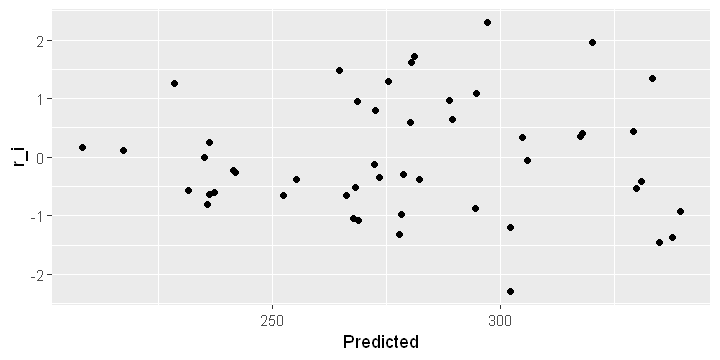

In [14]:
# residual plot
sub.res.dat <- cbind(sub.dat, rstandard(sub.res_lm), predict(sub.res_lm))
colnames(sub.res.dat)[c(7,8)] <- c("r_i", "Predicted")

ggplot(sub.res.dat, aes(x = Predicted, y = r_i)) + geom_point()

Figure 7.9 Plot of standardized residuals versus Regions (excluding Alaska) (203 page)

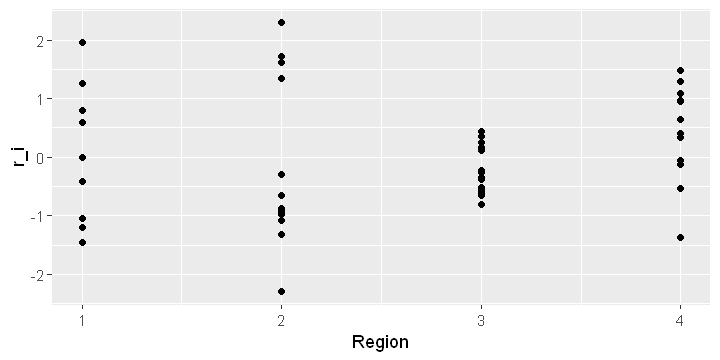

In [15]:
ggplot(sub.res.dat, aes(x = Region, y = r_i)) + geom_point()

Table 7.6 Weights cj for weighted Least squares (204 page)

In [17]:
# add residuals
sub.res.dat <- cbind(sub.res.dat, summary(sub.res_lm)$residual)
colnames(sub.res.dat)[c(9)] <- c("residual")

In [18]:
head(sub.res.dat)

State,Y,X1,X2,X3,Region,r_i,Predicted,residual
ME,235,3944,325,508,1,-0.002112462,235.0735,-0.07353745
NH,231,4578,323,564,1,-1.041857222,267.6580,-36.65799804
VT,270,4011,328,322,1,1.255256208,228.5467,41.45328444
MA,261,5233,305,846,1,-1.192622352,302.1607,-41.16069577
RI,300,4780,303,871,1,0.594918815,280.1797,19.82025291
CT,317,5889,307,774,1,-0.408731307,330.8060,-13.80598235


In [19]:
# n_j by regions
sub.n <- as.numeric(table(sub.res.dat$Region))
sub.n

[1]  9 12 16 12

In [20]:
# sigma^2 by regions
sigma2_R1 <- sum((sub.res.dat[which(sub.res.dat$Region==1),"residual"])^2)/(sub.n[1]-1)
sigma2_R2 <- sum((sub.res.dat[which(sub.res.dat$Region==2),"residual"])^2)/(sub.n[2]-1)
sigma2_R3 <- sum((sub.res.dat[which(sub.res.dat$Region==3),"residual"])^2)/(sub.n[3]-1)
sigma2_R4 <- sum((sub.res.dat[which(sub.res.dat$Region==4),"residual"])^2)/(sub.n[4]-1)

round(sigma2_R1,2)
round(sigma2_R2,2)
round(sigma2_R3,2)
round(sigma2_R4,2)

[1] 1632.5

[1] 2658.52

[1] 266.06

[1] 1036.83

In [21]:
c_1 <- sqrt(sigma2_R1/(sum(sub.res.dat[,"residual"]^2)/length(sub.res.dat[,"residual"])))
c_2 <- sqrt(sigma2_R2/(sum(sub.res.dat[,"residual"]^2)/length(sub.res.dat[,"residual"])))
c_3 <- sqrt(sigma2_R3/(sum(sub.res.dat[,"residual"]^2)/length(sub.res.dat[,"residual"])))
c_4 <- sqrt(sigma2_R4/(sum(sub.res.dat[,"residual"]^2)/length(sub.res.dat[,"residual"])))

round(c_1,3)
round(c_2,3)
round(c_3,3)
round(c_4,3)

[1] 1.177

[1] 1.503

[1] 0.475

[1] 0.938

In [22]:
head(sub.res.dat)

State,Y,X1,X2,X3,Region,r_i,Predicted,residual
ME,235,3944,325,508,1,-0.002112462,235.0735,-0.07353745
NH,231,4578,323,564,1,-1.041857222,267.6580,-36.65799804
VT,270,4011,328,322,1,1.255256208,228.5467,41.45328444
MA,261,5233,305,846,1,-1.192622352,302.1607,-41.16069577
RI,300,4780,303,871,1,0.594918815,280.1797,19.82025291
CT,317,5889,307,774,1,-0.408731307,330.8060,-13.80598235


In [23]:
sub.res.dat$wts <- NA

In [24]:
sub.res.dat[which(sub.res.dat$Region==1), "wts"] = c_1
sub.res.dat[which(sub.res.dat$Region==2), "wts"] = c_2
sub.res.dat[which(sub.res.dat$Region==3), "wts"] = c_3
sub.res.dat[which(sub.res.dat$Region==4), "wts"] = c_4

In [25]:
head(sub.res.dat)

State,Y,X1,X2,X3,Region,r_i,Predicted,residual,wts
ME,235,3944,325,508,1,-0.002112462,235.0735,-0.07353745,1.177438
NH,231,4578,323,564,1,-1.041857222,267.6580,-36.65799804,1.177438
VT,270,4011,328,322,1,1.255256208,228.5467,41.45328444,1.177438
MA,261,5233,305,846,1,-1.192622352,302.1607,-41.16069577,1.177438
RI,300,4780,303,871,1,0.594918815,280.1797,19.82025291,1.177438
CT,317,5889,307,774,1,-0.408731307,330.8060,-13.80598235,1.177438


In [26]:
tail(sub.res.dat)

,State,Y,X1,X2,X3,Region,r_i,Predicted,residual,wts
44,UT,315,4005,378,804,4,0.3410517,304.7970,10.20302,0.9383478
45,NV,291,5560,330,809,4,-1.3627132,337.6545,-46.65453,0.9383478
46,WA,312,4989,313,726,4,0.6396516,289.4575,22.54246,0.9383478
47,OR,316,4697,305,671,4,1.4743146,264.5869,51.41309,0.9383478
48,CA,332,5438,307,909,4,0.4086428,318.0426,13.95743,0.9383478
49,HI,311,5309,333,831,4,-0.5409239,329.6631,-18.66311,0.9383478


In [27]:
# Weighted Least Squares
sub.res_lm_wls <- lm(Y ~ X1 + X2 + X3, weights=1/(wts)^2, data = sub.res.dat)
summary(sub.res_lm_wls)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = sub.res.dat, weights = 1/(wts)^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-55.498 -23.383  -2.447  26.233  61.651 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.160e+02  7.742e+01  -4.082 0.000181 ***
X1           6.246e-02  7.803e-03   8.005 3.39e-10 ***
X2           8.740e-01  1.984e-01   4.405 6.46e-05 ***
X3           2.892e-02  3.399e-02   0.851 0.399351    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.33 on 45 degrees of freedom
Multiple R-squared:  0.7605,	Adjusted R-squared:  0.7445 
F-statistic: 47.62 on 3 and 45 DF,  p-value: 5.189e-14


In [28]:
# Table 7.7 WLS coefficients for Education Data (n=49), Alaska Omitted
round(summary(sub.res_lm)$coefficients,3)
round(summary(sub.res_lm_wls)$coefficients,3)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-277.577,132.423,-2.096,0.042
X1,0.048,0.012,3.976,0.000
X2,0.887,0.331,2.678,0.010
X3,0.067,0.049,1.354,0.183


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-316.024,77.419,-4.082,0.000
X1,0.062,0.008,8.005,0.000
X2,0.874,0.198,4.405,0.000
X3,0.029,0.034,0.851,0.399


Figure 7.10 Standardized residuals versus fitted values for WLS solution (205 page)

In [29]:
head(sub.res.dat)

State,Y,X1,X2,X3,Region,r_i,Predicted,residual,wts
ME,235,3944,325,508,1,-0.002112462,235.0735,-0.07353745,1.177438
NH,231,4578,323,564,1,-1.041857222,267.6580,-36.65799804,1.177438
VT,270,4011,328,322,1,1.255256208,228.5467,41.45328444,1.177438
MA,261,5233,305,846,1,-1.192622352,302.1607,-41.16069577,1.177438
RI,300,4780,303,871,1,0.594918815,280.1797,19.82025291,1.177438
CT,317,5889,307,774,1,-0.408731307,330.8060,-13.80598235,1.177438


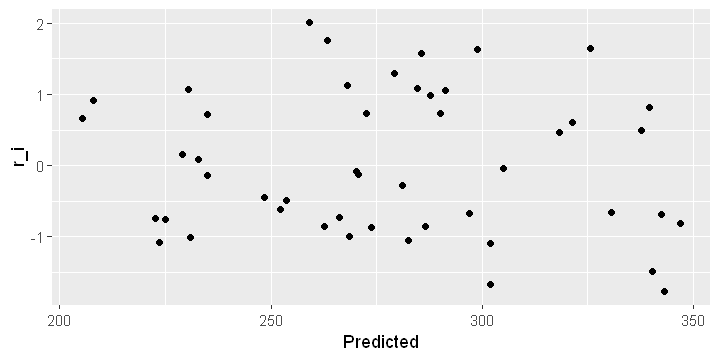

In [30]:
# residual plot
sub.res.dat$r_i <- rstandard(sub.res_lm_wls)
sub.res.dat$Predicted <- predict(sub.res_lm_wls)

ggplot(sub.res.dat, aes(x = Predicted, y = r_i)) + geom_point()

Figure 7.11 Standardized residuals by geographic region for WLS solution (205 page)

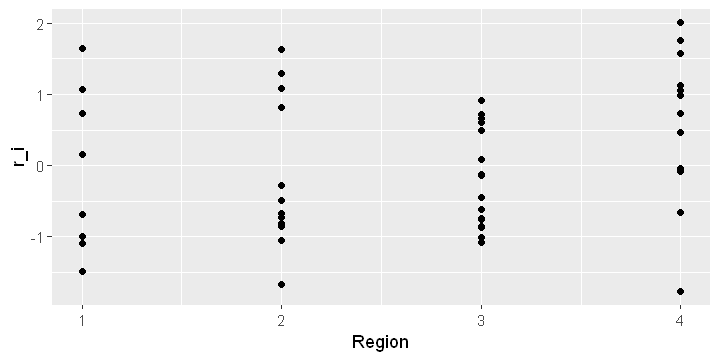

In [31]:
ggplot(sub.res.dat, aes(x = Region, y = r_i)) + geom_point()